https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

https://www.kaggle.com/c/sberbank-russian-housing-market/data

In [1]:
import kaggle

In [2]:
kaggle.api.authenticate()

In [3]:
#kaggle.api.dataset_download_files('The_name_of_the_dataset', path='the_path_you_want_to_download_the_files_to', unzip=True)

In [4]:
!kaggle competitions download -c sberbank-russian-housing-market

403 - Forbidden


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv( 'J://MyFiles//Fabrice//datascience//data//sberbank-russian-housing-market//train.csv' )

In [3]:
df.shape

(30471, 292)

In [20]:
df.dtypes

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     

In [105]:
# variables par type
df.dtypes.value_counts().sort_values( ascending = False )

int64             160
float64           119
object             17
datetime64[ns]      1
dtype: int64

In [18]:
# df de variabes numériques

df_num = df.select_dtypes( include = [ np.number ] )

num_cols = df_num.columns.values

print( num_cols )

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

In [25]:
# df de variables non numériques

df_nnum = df.select_dtypes( exclude = [ np.number ] )

nnum_cols = df_nnum.columns.values

print( nnum_cols )

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


# [ 0 ] - Missing data

## [ 0.1 ] - Missing data heatmap

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.mlab as mlab

import matplotlib

plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = ( 12 , 8 )

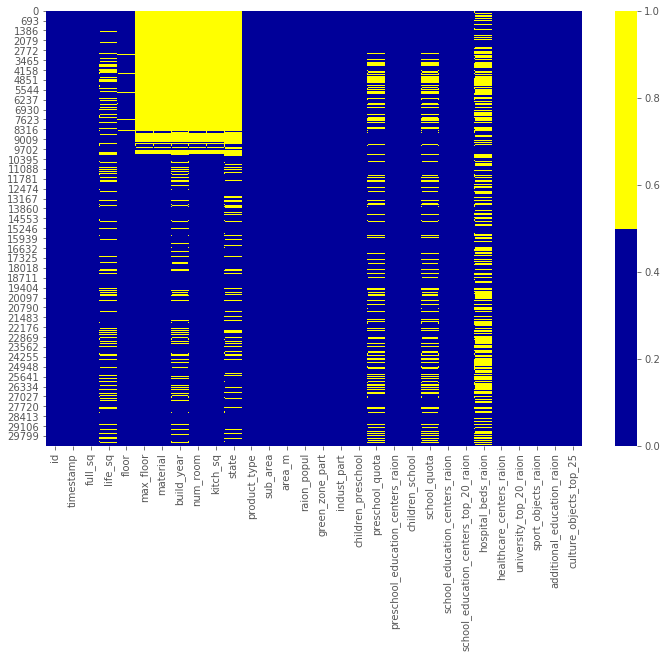

In [47]:
cols = df.columns[ : 30 ] # first 30 columns

colours = [ '#000099' , '#ffff00' ] # specify the colours - yellow is missing. blue is not missing.

sns.heatmap( df[cols].isnull(), cmap = sns.color_palette( colours ) )

## [ 0.2 ] - Missing Data Percentage List

In [5]:
prop_miss_by_col = {}

for col in df.columns:
    
    p_miss = np.mean( df[col].isnull() )
    
    prop_miss_by_col.update( { col : p_miss } )
    
    print( '{0} - {1} %'.format( col , round( p_miss * 100 ) ) )

id - 0.0 %
timestamp - 0.0 %
full_sq - 0.0 %
life_sq - 21.0 %
floor - 1.0 %
max_floor - 31.0 %
material - 31.0 %
build_year - 45.0 %
num_room - 31.0 %
kitch_sq - 31.0 %
state - 44.0 %
product_type - 0.0 %
sub_area - 0.0 %
area_m - 0.0 %
raion_popul - 0.0 %
green_zone_part - 0.0 %
indust_part - 0.0 %
children_preschool - 0.0 %
preschool_quota - 22.0 %
preschool_education_centers_raion - 0.0 %
children_school - 0.0 %
school_quota - 22.0 %
school_education_centers_raion - 0.0 %
school_education_centers_top_20_raion - 0.0 %
hospital_beds_raion - 47.0 %
healthcare_centers_raion - 0.0 %
university_top_20_raion - 0.0 %
sport_objects_raion - 0.0 %
additional_education_raion - 0.0 %
culture_objects_top_25 - 0.0 %
culture_objects_top_25_raion - 0.0 %
shopping_centers_raion - 0.0 %
office_raion - 0.0 %
thermal_power_plant_raion - 0.0 %
incineration_raion - 0.0 %
oil_chemistry_raion - 0.0 %
radiation_raion - 0.0 %
railroad_terminal_raion - 0.0 %
big_market_raion - 0.0 %
nuclear_reactor_raion - 0.0

In [6]:
print( prop_miss_by_col  )

{'id': 0.0, 'timestamp': 0.0, 'full_sq': 0.0, 'life_sq': 0.20947786419874634, 'floor': 0.005480620918250139, 'max_floor': 0.31413475107479244, 'material': 0.31413475107479244, 'build_year': 0.44649010534606676, 'num_room': 0.31413475107479244, 'kitch_sq': 0.31413475107479244, 'state': 0.44498047323684814, 'product_type': 0.0, 'sub_area': 0.0, 'area_m': 0.0, 'raion_popul': 0.0, 'green_zone_part': 0.0, 'indust_part': 0.0, 'children_preschool': 0.0, 'preschool_quota': 0.2194873814446523, 'preschool_education_centers_raion': 0.0, 'children_school': 0.0, 'school_quota': 0.21938892717665978, 'school_education_centers_raion': 0.0, 'school_education_centers_top_20_raion': 0.0, 'hospital_beds_raion': 0.4739260280266483, 'healthcare_centers_raion': 0.0, 'university_top_20_raion': 0.0, 'sport_objects_raion': 0.0, 'additional_education_raion': 0.0, 'culture_objects_top_25': 0.0, 'culture_objects_top_25_raion': 0.0, 'shopping_centers_raion': 0.0, 'office_raion': 0.0, 'thermal_power_plant_raion': 0.

## [ 0.3 ] - Missing Data Histogram

In [29]:
# Observations avec 0, 1, 2, ... valeurs manquantes

In [48]:
import numpy as np

In [49]:
for col in df.columns:
    
    miss = df[ col ].isnull()
    num_miss = np.sum( miss )
    
    if num_miss > 0:  
        # créatuion de colonnes <col>_ismissing si valeurs manquantes dans <col>
        df[ '{}_ismissing'.format(col) ] = miss

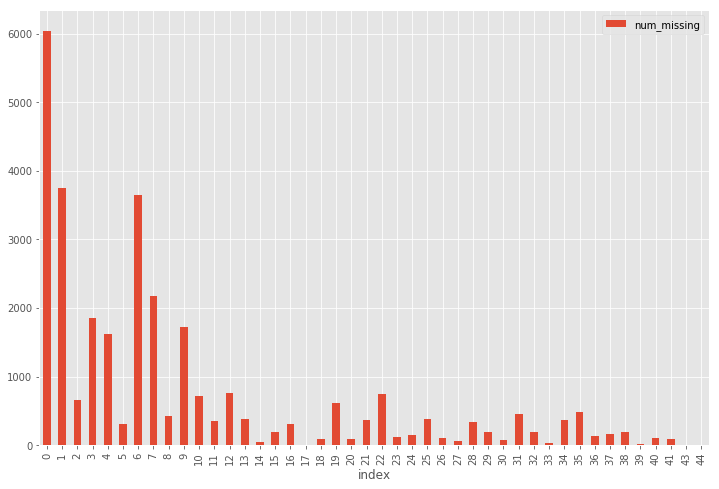

In [50]:
ismissing_cols = [ col for col in df.columns if 'ismissing' in col ]

df[ 'num_missing' ] = df[ismissing_cols].sum( axis = 1 )

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x = 'index' , y = 'num_missing' )


## [ 0.4 ] - Drop the Observation

In [51]:
# Suppression des enregistrments avec plus de 30 variables avec valeur manquante

In [55]:
ndx_miss = df[ df[ 'num_missing' ] > 35 ].index

df_less_missing_rows = df.drop( ndx_miss , axis = 0 )

df_less_missing_rows.shape

(29779, 344)

## [ 0.5 ] - Drop the Feature

In [65]:
# Suppression de la variable si plus de x % de valeurs manquantes

miss_val_thresh = 0.10

col_2drop = [ ]

for col in df.columns :
    
    if np.mean( df[col].isnull() ) > miss_val_thresh :
        col_2drop.append( col )
        
print( col_2drop )

['life_sq', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'preschool_quota', 'school_quota', 'hospital_beds_raion', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500']


In [13]:
threshold = 0.40

col_2drop = [ ]

for item in prop_miss_by_col.items() :
    
    if item[1] >= threshold :
        col_2drop.append( item[0] )
        
print( col_2drop )
        
df_drop_col_miss = df.drop( col_2drop )

['build_year']
['build_year', 'state']
['build_year', 'state', 'hospital_beds_raion']
['build_year', 'state', 'hospital_beds_raion', 'cafe_sum_500_min_price_avg']
['build_year', 'state', 'hospital_beds_raion', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg']
['build_year', 'state', 'hospital_beds_raion', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500']


In [14]:
df_drop_col_miss = df.drop( col_2drop , axis = 1 )

In [16]:
df.shape

(30471, 292)

In [15]:
df_drop_col_miss.shape

(30471, 286)

## [ 0.6 ] - Impute the missing

In [23]:
for col in list( df_num.columns ) :
    
    if np.sum( df[ col ].isnull( ) ) > 0 :
        print( ' {0} has missing values'.format( col ) )
        med = df[ col ].median( )
        df[ col ].fillna( med )

 life_sq has missing values
 floor has missing values
 max_floor has missing values
 material has missing values
 build_year has missing values
 num_room has missing values
 kitch_sq has missing values
 state has missing values
 preschool_quota has missing values
 school_quota has missing values
 hospital_beds_raion has missing values
 raion_build_count_with_material_info has missing values
 build_count_block has missing values
 build_count_wood has missing values
 build_count_frame has missing values
 build_count_brick has missing values
 build_count_monolith has missing values
 build_count_panel has missing values
 build_count_foam has missing values
 build_count_slag has missing values
 build_count_mix has missing values
 raion_build_count_with_builddate_info has missing values
 build_count_before_1920 has missing values
 build_count_1921-1945 has missing values
 build_count_1946-1970 has missing values
 build_count_1971-1995 has missing values
 build_count_after_1995 has missing va

In [26]:
for col in list( df_nnum.columns ) :
    
    if np.sum( df[ col ].isnull( ) ) > 0 :
        print( ' {0} has missing values'.format( col ) )
        top = df[ col ].describe()[ 'top' ]
        df[ col ].fillna( top )

## [ 0.7 ] - Replace the missing

In [27]:
for col in list( df_num.columns ) :
    
    if np.sum( df[ col ].isnull( ) ) > 0 :
        print( ' {0} has missing values'.format( col ) ) 
        df[ col ] = df[ col ].fillna( -999 )

 life_sq has missing values
 floor has missing values
 max_floor has missing values
 material has missing values
 build_year has missing values
 num_room has missing values
 kitch_sq has missing values
 state has missing values
 preschool_quota has missing values
 school_quota has missing values
 hospital_beds_raion has missing values
 raion_build_count_with_material_info has missing values
 build_count_block has missing values
 build_count_wood has missing values
 build_count_frame has missing values
 build_count_brick has missing values
 build_count_monolith has missing values
 build_count_panel has missing values
 build_count_foam has missing values
 build_count_slag has missing values
 build_count_mix has missing values
 raion_build_count_with_builddate_info has missing values
 build_count_before_1920 has missing values
 build_count_1921-1945 has missing values
 build_count_1946-1970 has missing values
 build_count_1971-1995 has missing values
 build_count_after_1995 has missing va

In [28]:
for col in list( df_nnum.columns ) :
    
    if np.sum( df[ col ].isnull( ) ) > 0 :
        print( ' {0} has missing values'.format( col ) )
        df[ col ].fillna( _missing_ )

# [ 1 ] - Irregular data (Outliers)

## [ 1.1 ] - Histogram / Boxplot

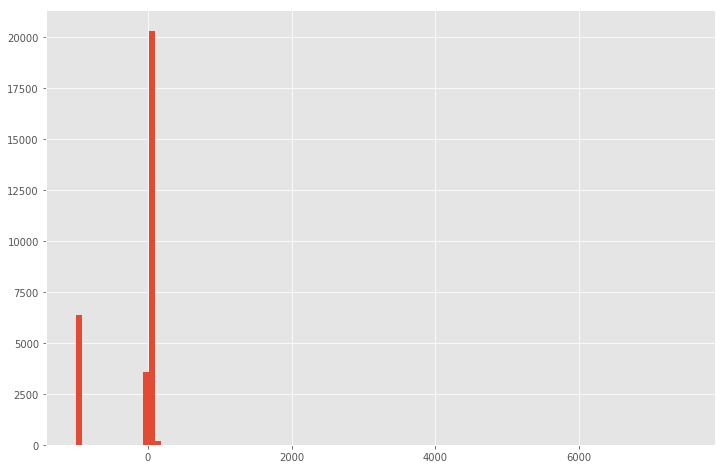

In [32]:
df[ 'life_sq' ].hist( bins = 100 )

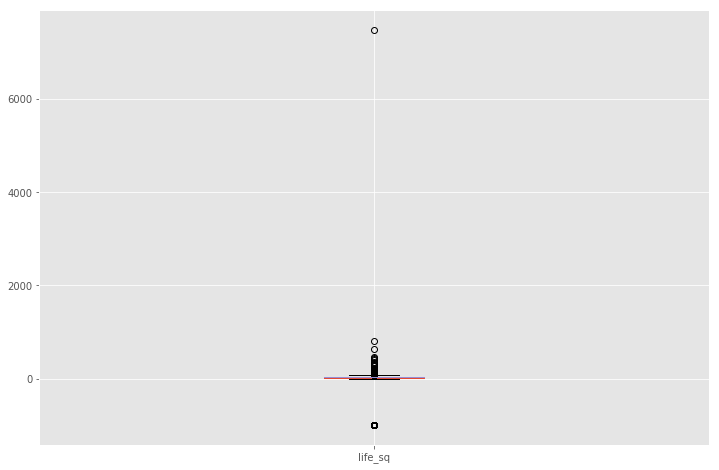

In [30]:
df.boxplot( column = [ 'life_sq' ] )

## [ 1.2 ] - Descriptive Statistics

In [33]:
# Ecart important entre max & 75%

df['life_sq'].describe()

count    30471.000000
mean      -182.071839
std        423.097538
min       -999.000000
25%         16.000000
50%         27.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

## [ 1.3 ] - Bar Chart

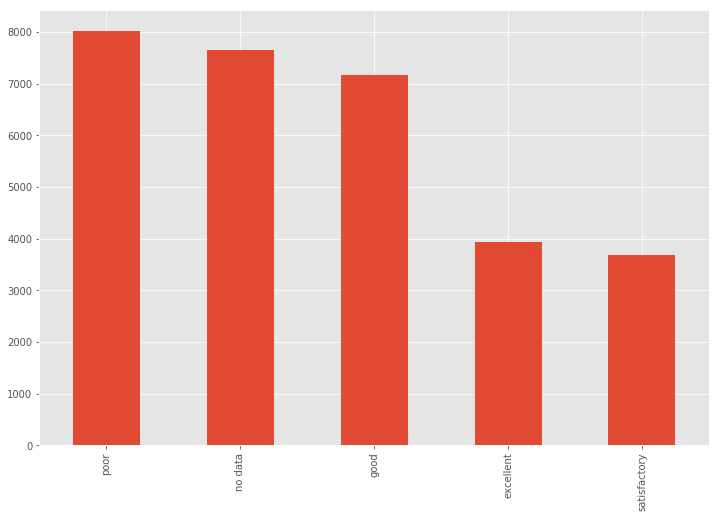

In [36]:
df[ 'ecology' ].value_counts().plot.bar()

# [ 2 ] - Unnecessary data

## [ 2.1 ] - Uninformative / Repetitive

In [63]:
df[ 'mosque_count_5000' ].value_counts( dropna = False ) / len( df.index )

0    0.619835
1    0.317909
2    0.062256
Name: mosque_count_5000, dtype: float64

In [51]:
 ( df[ 'ecology' ].value_counts( dropna = False ) / len( df.index ) ).index[0]

'poor'

In [55]:
 ( df[ 'ecology' ].value_counts( dropna = False ) / len( df.index ) ).iloc[ 0 ]

0.2631354402546684

In [67]:
# Liste de colonnes avec fort % de valeurs identiques

threshold = 0.95

low_nfo_cols = [] 

for col in df.columns:
    
    col_val_p = df[ col ].value_counts( dropna = False ) / len( df.index )
    
    top_val = col_val_p.index[ 0 ] 
    top_p = col_val_p.iloc[ 0 ] 
    
    #print( 'threshold : {0} | column : {1} | top % value : {2} | top % : {3}'.format( threshold , col , top_val , top_p ) )
    
    if top_p > threshold :
        low_nfo_cols.append( col )
        
print( 'low information columns : {0}'.format( low_nfo_cols ) )

low information columns : ['oil_chemistry_raion', 'railroad_terminal_raion', 'nuclear_reactor_raion', 'big_road1_1line', 'railroad_1line', 'cafe_count_500_price_high', 'mosque_count_500', 'cafe_count_1000_price_high', 'mosque_count_1000', 'mosque_count_1500']


## [ 2.2 ] - Irrelevant

## [ 2.3 ] - Duplicates

### [ 2.3.1 ] - All Features based

In [68]:
df_dedup = df.drop( 'id' , axis = 1 ).drop_duplicates()

In [69]:
df.shape

(30471, 292)

In [70]:
df_dedup.shape

(30461, 291)

### [ 2.3.2 ] - Key Features based

In [72]:
key = [ 'timestamp' , 'full_sq' , 'life_sq' , 'floor' , 'build_year' , 'num_room' , 'price_doc' ]

df_dedup = df.drop_duplicates( subset = key )

In [73]:
df.shape

(30471, 292)

In [74]:
df_dedup.shape

(30455, 292)

# [ 3 ] - Inconsistent data

## [ 3.1 ] - Capitalization

In [75]:
df[ 'sub_area' ].value_counts( dropna = False )

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
Mitino                             679
Tverskoe                           678
Krjukovo                           518
Mar'ino                            508
Poselenie Filimonkovskoe           496
Juzhnoe Butovo                     451
Poselenie Shherbinka               443
Solncevo                           421
Zapadnoe Degunino                  410
Poselenie Desjonovskoe             362
Otradnoe                           353
Nagatinskij Zaton                  327
Nagornoe                           305
Bogorodskoe                        305
Strogino                           301
Izmajlovo                          300
Tekstil'shhiki                     298
Ljublino                           297
Gol'janovo                         295
Severnoe Tushino                   282
Chertanovo Juzhnoe       

In [76]:
df[ 'sub_area_lower' ] = df[ 'sub_area' ].str.lower()

df[ 'sub_area_lower' ].value_counts( dropna = False )

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
mitino                             679
tverskoe                           678
krjukovo                           518
mar'ino                            508
poselenie filimonkovskoe           496
juzhnoe butovo                     451
poselenie shherbinka               443
solncevo                           421
zapadnoe degunino                  410
poselenie desjonovskoe             362
otradnoe                           353
nagatinskij zaton                  327
nagornoe                           305
bogorodskoe                        305
strogino                           301
izmajlovo                          300
tekstil'shhiki                     298
ljublino                           297
gol'janovo                         295
severnoe tushino                   282
chertanovo juzhnoe       

In [79]:
df.dtypes.value_counts()

int64      157
float64    119
object      17
dtype: int64

In [83]:
df.select_dtypes( include = [ object ] ).columns

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology',
       'sub_area_lower'],
      dtype='object')

In [84]:
obj_cols = df.select_dtypes( include = [ object ] ).columns

for col in obj_cols :
    df[ col ] = df[ col ].str.lower()
    print( 'column {0} to lower'.format( col ) )

column timestamp to lower
column product_type to lower
column sub_area to lower
column culture_objects_top_25 to lower
column thermal_power_plant_raion to lower
column incineration_raion to lower
column oil_chemistry_raion to lower
column radiation_raion to lower
column railroad_terminal_raion to lower
column big_market_raion to lower
column nuclear_reactor_raion to lower
column detention_facility_raion to lower
column water_1line to lower
column big_road1_1line to lower
column railroad_1line to lower
column ecology to lower
column sub_area_lower to lower


## [ 3.2 ] - Format

In [89]:
df[ 'timestamp_dt' ] = pd.to_datetime( df[ 'timestamp' ] , format = '%Y-%m-%d' )

df['year'] = df['timestamp_dt'].dt.year

df['month'] = df['timestamp_dt'].dt.month

df['weekday'] = df['timestamp_dt'].dt.weekday

In [102]:
 df[ 'year' ].value_counts( dropna = False ).sort_index()

2011      753
2012     4839
2013     7978
2014    13662
2015     3239
Name: year, dtype: int64

In [101]:
df[ 'month' ].value_counts( dropna = False ).sort_index()

1     1809
2     2275
3     2972
4     3191
5     2496
6     2570
7     1875
8     1831
9     2346
10    2736
11    2970
12    3400
Name: month, dtype: int64

## [ 3.3 ] - Categorical Values

In [115]:
from nltk.metrics import edit_distance

In [124]:
a = [5, 7, 11, 4, 5, 2, 8]

In [128]:
list( zip(a, a[1:]) )

[(5, 7), (7, 11), (11, 4), (4, 5), (5, 2), (2, 8)]

In [134]:
 df[ 'ecology' ].value_counts().index

Index(['poor', 'no data', 'good', 'excellent', 'satisfactory'], dtype='object')

In [145]:
threshold = 2 

a = df[ 'ecology' ].value_counts().index

col_val = {}

# { 'ecology' : { ( 'poor' , 'no data' ) : 6 } }

for i , j in itertools.combinations( a , 2 ) :
    
    if edit_distance( i , j ) <= threshold :
        
    
    print( i , j , edit_distance( i , j ) )



poor no data 6
poor good 2
poor excellent 9
poor satisfactory 10
no data good 5
no data excellent 9
no data satisfactory 10
good excellent 9
good satisfactory 11
excellent satisfactory 11


In [147]:
df.select_dtypes( include = [ object ] ).columns

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology',
       'sub_area_lower'],
      dtype='object')

In [ ]:
threshold = 2

col_val = {}

cols =  df.select_dtypes( include = [ object ] ).columns

for col in cols :
    
    col_val.update( col : { } )
    
    vals = df[ col ].value_counts().index
    
    for v_1 , v_2 in itertools.combinations( vals , 2 ) :
        
        d = edit_distance( v_1 , v_2 )
        
        if d <= threshold :
            
            